📓 Notebook 03 — EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv("../datasets/processed/dados_mobilidade_integrados.csv")
dados["data"] = pd.to_datetime(dados["data"])

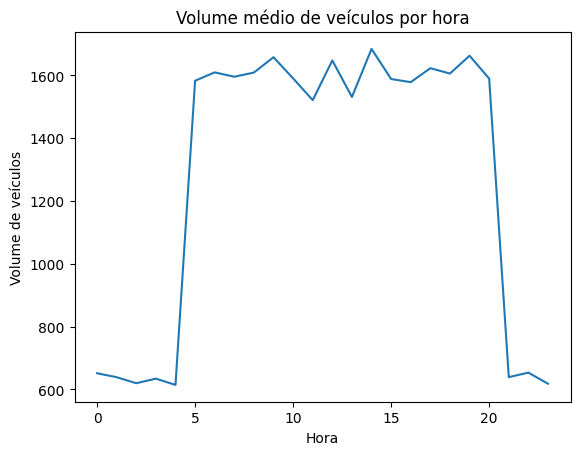

In [3]:
# ------------------------------------------
# 1. Horas de maior tráfego (line)
# ------------------------------------------
plt.plot(dados.groupby("hora")["volume_veiculos"].mean())
plt.title("Volume médio de veículos por hora")
plt.xlabel("Hora")
plt.ylabel("Volume de veículos")
plt.show()

1. RESPOSTA

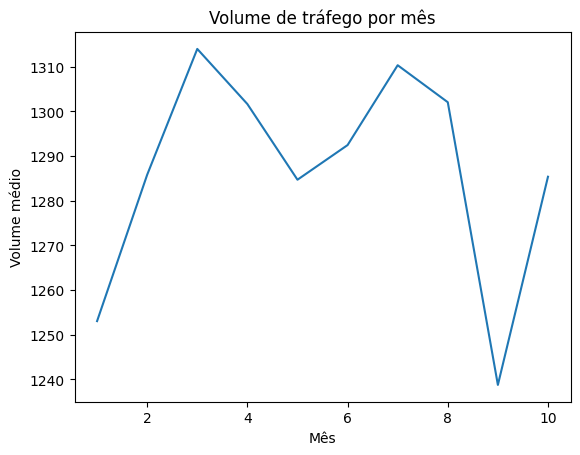

In [4]:
# ------------------------------------------
# 2. Evolução anual (seasonal)
# ------------------------------------------
dados.groupby("mes")["volume_veiculos"].mean().plot(kind="line")
plt.title("Volume de tráfego por mês")
plt.xlabel("Mês")
plt.ylabel("Volume médio")
plt.show()

2. RESPOSTA

In [5]:
# ------------------------------------------
# 3. Zonas urbanas com mais acidentes (bar)
# ------------------------------------------
dados.groupby("bairro")["numero_feridos"].sum().sort_values().plot(kind="bar")
plt.title("Acidentes por bairro")
plt.show()

KeyError: 'bairro'

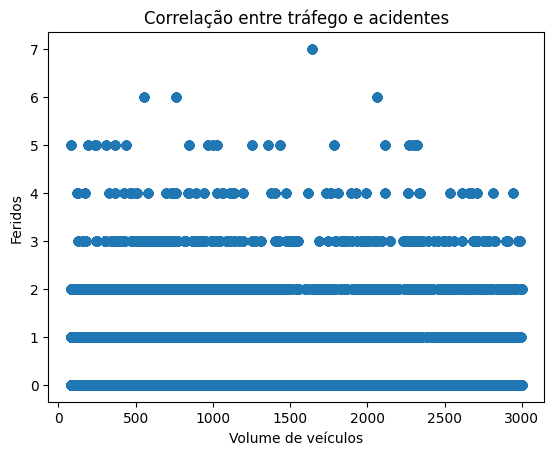

In [6]:
# ------------------------------------------
# 4. Correlação tráfego × acidentes (scatter)
# ------------------------------------------
plt.scatter(dados["volume_veiculos"], dados["numero_feridos"])
plt.xlabel("Volume de veículos")
plt.ylabel("Feridos")
plt.title("Correlação entre tráfego e acidentes")
plt.show()

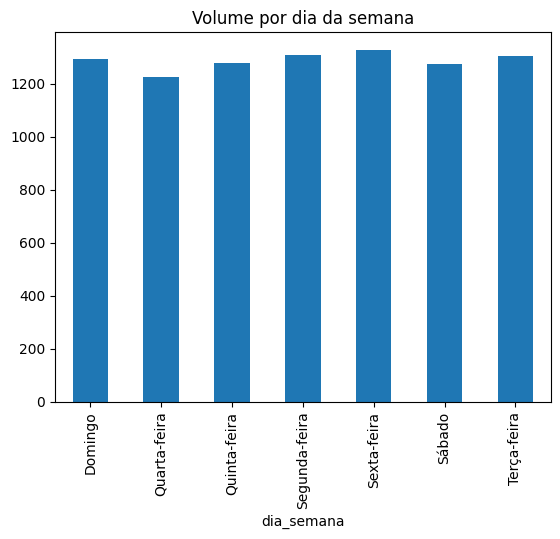

In [7]:
# ------------------------------------------
# 5. Padrões sazonais (dias)
# ------------------------------------------
dados.groupby("dia_semana")["volume_veiculos"].mean().plot(kind="bar")
plt.title("Volume por dia da semana")
plt.show()

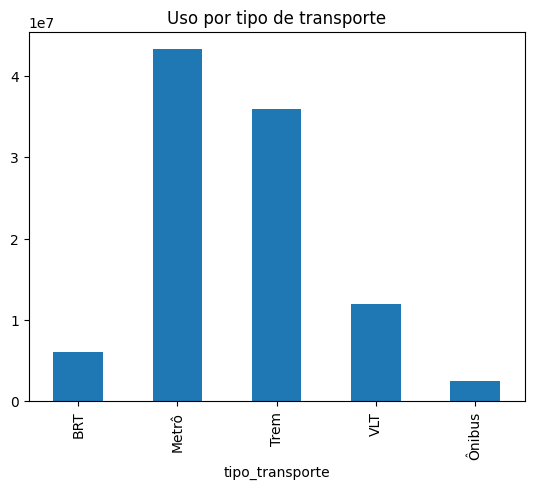

In [8]:
# ------------------------------------------
# 6. Uso do transporte (bar)
# ------------------------------------------
dados.groupby("tipo_transporte")["n_passageiros"].sum().plot(kind="bar")
plt.title("Uso por tipo de transporte")
plt.show()

In [9]:
# ------------------------------------------
# 7. Eficiência transporte público
# ------------------------------------------
dados.groupby("tipo_transporte")["velocidade_media"].mean().sort_values().plot(kind="bar")
plt.title("Eficiência média do transporte")
plt.show()

KeyError: 'Column not found: velocidade_media'

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

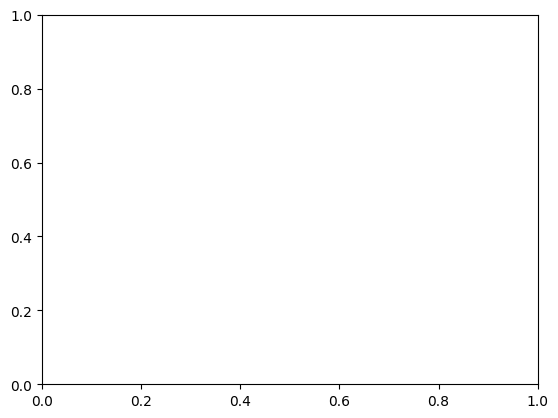

In [10]:
# ------------------------------------------
# 8. Outliers congestionamento (box)
# ------------------------------------------
plt.boxplot(dados["nivel_congestionamento"].dropna())
plt.title("Outliers — Nível de congestionamento")
plt.show()

8. RESPOSTA

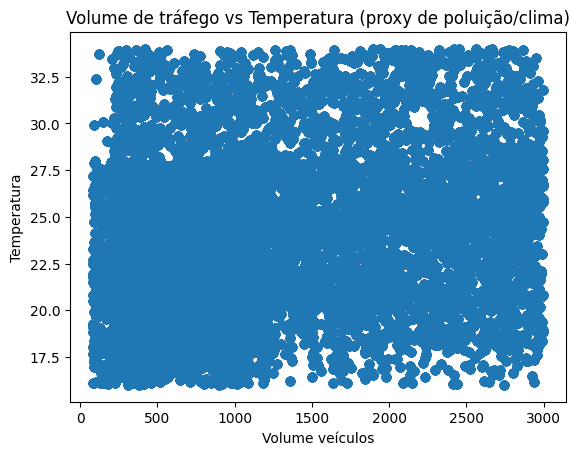

In [11]:
# ------------------------------------------
# 9. Poluição vs Tráfego (scatter)
# ------------------------------------------
plt.scatter(dados["volume_veiculos"], dados["temperatura"])
plt.title("Volume de tráfego vs Temperatura (proxy de poluição/clima)")
plt.xlabel("Volume veículos")
plt.ylabel("Temperatura")
plt.show()

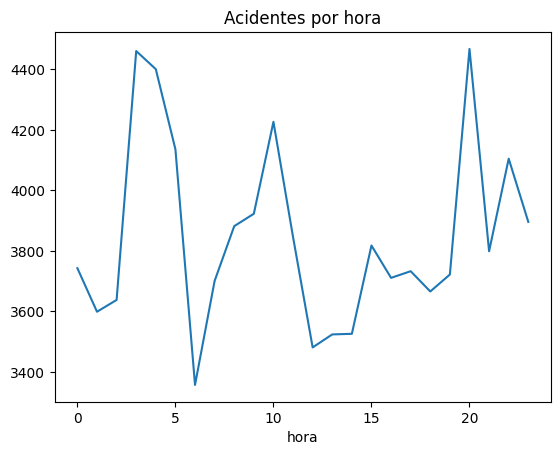

In [12]:
# ------------------------------------------
# 10. Horários mais seguros (acidentes/hora)
# ------------------------------------------
dados.groupby("hora")["numero_feridos"].sum().plot(kind="line")
plt.title("Acidentes por hora")
plt.show()

In [13]:
# ------------------------------------------
# 11. Rotas mais congestionadas
# ------------------------------------------
dados.groupby("rota")["nivel_congestionamento"].mean().sort_values().plot(kind="bar")
plt.title("Rotas mais congestionadas")
plt.show()

KeyError: 'rota'

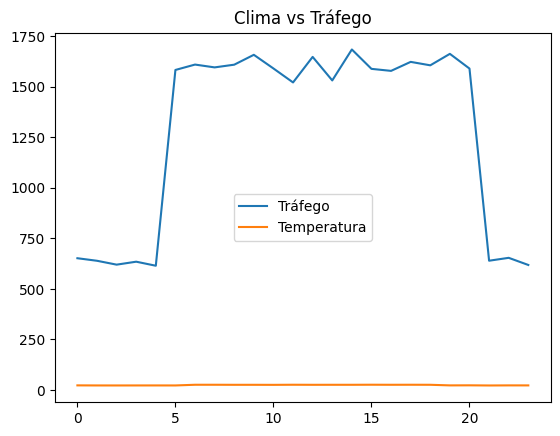

In [14]:
# ------------------------------------------
# 13. Meteorologia × Tráfego (overlay)
# ------------------------------------------
plt.plot(dados.groupby("hora")["volume_veiculos"].mean(), label="Tráfego")
plt.plot(dados.groupby("hora")["temperatura"].mean(), label="Temperatura")
plt.legend()
plt.title("Clima vs Tráfego")
plt.show()

In [15]:
# ------------------------------------------
# 14. Efeito de políticas públicas
# ------------------------------------------
if "variacao_trafego" in dados:
    dados.groupby("data")["variacao_trafego"].mean().plot(kind="line")
    plt.title("Efeito das políticas no tráfego")
    plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [16]:
# ------------------------------------------
# 15. Mobilidade por bairro/renda
# ------------------------------------------
dados.groupby("bairro")["volume_veiculos"].mean().plot(kind="bar")
plt.title("Tráfego por bairro")
plt.show()

KeyError: 'bairro'